In [47]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv

# Create an empty graph
graph = nx.Graph()

In [48]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]
        # Add the user node to graph with blue color
        graph.add_node(row[0], name=row[1], repos=row[2], color="#7FB2FD")

In [49]:
# Open the CSV file and read the data for repositories
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        # Add the repository node to graph with pink color
        graph.add_node(row[0], name=row[1], languages=row[2], color="#FF8CCD")


In [50]:
# Add edges between users and repositories based on the users' list of repositories
for node in graph.nodes:
    # if it's a user node
    if node[0] == "u":
        # for each repository in the user's list of repositories
        for repo in graph.nodes[node]['repos']:
            # add an edge between the user and the repository
            graph.add_edge(node, repo)

In [51]:
# Print the number of nodes and edges
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 4432
Number of edges: 6375


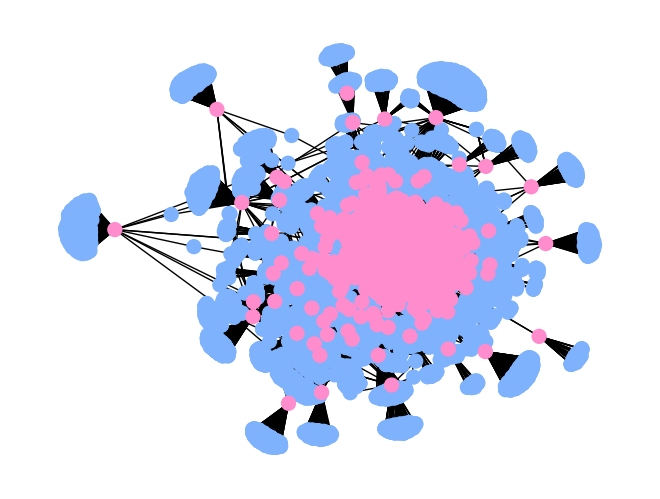

In [52]:
# Draw the graph using color property to distinguish users and repositories
nx.draw(graph, node_color=[graph.nodes[node]['color'] for node in graph.nodes], node_size=100)

In [53]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(graph)

# Split the degree centrality for users and repositories
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}
repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))

# Print the degree centrality of first 10 repositories in descending order
print("\nDegree centrality of first 10 repositories in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for repositories
print("\nMean degree centrality for repositories:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))


Degree centrality of first 10 users in descending order:
u_1710 0.22432859399684044
u_1387 0.22297449785601445
u_2712 0.009027307605506657
u_776 0.006093432633716994
u_1205 0.004062288422477996
u_1461 0.0038366057323403293
u_2125 0.003610923042202663
u_2180 0.003610923042202663
u_3060 0.002933874971789664
u_3222 0.002933874971789664

Mean degree centrality for users: 0.0004184779376462035

Degree centrality of first 10 repositories in descending order:
r_667 0.07086436470322727
r_963 0.05055292259083728
r_126 0.028887384337621305
r_216 0.028887384337621305
r_76 0.023696682464454975
r_2 0.02279395170390431
r_3 0.020537124802527645
r_225 0.019183028661701646
r_969 0.018731663281426315
r_115 0.01828029790115098

Mean degree centrality for repositories: 0.001447411619343704


In [54]:
# Calculate the betweenness centrality of all nodes
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate the betweenness centrality of users nodes
users_betweenness_centrality = { k: v for k, v in betweenness_centrality.items() if k.startswith('u_')}

In [55]:

# Print the betweenness centrality of first 10 users in descending order
for node, centrality in sorted(users_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)

# Print mean betweenness centrality for users
print("\nMean betweenness centrality for users:", sum(users_betweenness_centrality.values())/len(users_betweenness_centrality))


Node u_1710 has betweenness centrality 0.4703289313283779
Node u_1387 has betweenness centrality 0.4398901534290559
Node u_2712 has betweenness centrality 0.009618500765823849
Node u_2125 has betweenness centrality 0.004504485559402676
Node u_2180 has betweenness centrality 0.003881150205018476
Node u_3174 has betweenness centrality 0.0030214588822351637
Node u_957 has betweenness centrality 0.0025193007937907705
Node u_1207 has betweenness centrality 0.0024694943601352936
Node u_776 has betweenness centrality 0.002030059550218193
Node u_28 has betweenness centrality 0.001999912391358061

Mean betweenness centrality for users: 0.00028614468189174115


In [56]:
# Calculate the eigenvector centrality of all nodes
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

# Calculate the eigenvector centrality of repos nodes
repos_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('r_')}

# Calculate the eigenvector centrality of users nodes
users_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('u_')}

# Print the eigenvector centrality of first 10 repos in descending order
print("\nEigenvector centrality of first 10 repositories in descending order:")
for node, centrality in sorted(repos_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Repository", node, "has eigenvector centrality", centrality)

# Print the eigenvector centrality of first 10 users in descending order
print("\nEigenvector centrality of first 10 users in descending order:")
for node, centrality in sorted(users_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("User", node, "has eigenvector centrality", centrality)


Eigenvector centrality of first 10 repositories in descending order:
Repository r_667 has eigenvector centrality 0.02807241600112121
Repository r_963 has eigenvector centrality 0.0252872002485827
Repository r_126 has eigenvector centrality 0.02508444065051212
Repository r_204 has eigenvector centrality 0.024918586221542628
Repository r_969 has eigenvector centrality 0.02484594166364357
Repository r_3 has eigenvector centrality 0.024744005513770605
Repository r_41 has eigenvector centrality 0.024621133427994935
Repository r_252 has eigenvector centrality 0.02459630822116519
Repository r_0 has eigenvector centrality 0.02452737750133048
Repository r_115 has eigenvector centrality 0.024420314891656622

Eigenvector centrality of first 10 users in descending order:
User u_1710 has eigenvector centrality 0.49917648037912005
User u_1387 has eigenvector centrality 0.4976560737491123
User u_2712 has eigenvector centrality 0.021178422969835194
User u_776 has eigenvector centrality 0.014040285764

In [60]:
# Calculate different subgraphs based on language of repositories
subgraphs = {}
for node in graph.nodes:
    if node[0] == "r":
        for language in graph.nodes[node]['languages']:
            if language not in subgraphs:
                subgraphs[language] = nx.Graph()
            subgraphs[language].add_node(node)
            for neighbor in graph.neighbors(node):
                subgraphs[language].add_node(neighbor)
                subgraphs[language].add_edge(node, neighbor)

# Print the number of nodes and edges in each subgraph
""" for language in subgraphs:
    print("Number of nodes in subgraph", language, ":", subgraphs[language].number_of_nodes())
    print("Number of edges in subgraph", language, ":", subgraphs[language].number_of_edges()) """

# Create a subgraph for every subgraph in subgraphs where reporitories are connected if they have at least one common user
unfrozen_subgraphs = {}
# For each language-subgraph
for subgraph in subgraphs:
    unfrozen_subgraphs[subgraph] = subgraphs[subgraph].copy()
    # For each node in the language-subgraph
    for node in unfrozen_subgraphs[subgraph].nodes:
        # If the node is a repository
        if node[0] == "r":
            language_subgraph = unfrozen_subgraphs[subgraph].copy()
            # For each neighbor of the repository
            for neighbor in language_subgraph.neighbors(node):
                # If the neighbor is a user
                if neighbor[0] == "u":
                    # For each neighbor of the user
                    for neighbor_of_neighbor in language_subgraph.neighbors(neighbor):
                        # If the neighbor of the user is a repository
                        if neighbor_of_neighbor[0] == "r":
                            # If the neighbor of the user is not the repository "node"
                            if neighbor_of_neighbor != node:
                                # Add an edge between the repository "node" and the other repository "neighbor_of_neighbor"
                                unfrozen_subgraphs[subgraph].add_edge(node, neighbor_of_neighbor)

# Remove from each subgraph the users nodes
for subgraph in unfrozen_subgraphs:
    unfrozen_subgraphs[subgraph] = unfrozen_subgraphs[subgraph].copy()
    unfrozen_subgraphs[subgraph].remove_nodes_from([node for node in unfrozen_subgraphs[subgraph].nodes if node[0] == "u"])

# Calculate the clustering coefficient for each subgraph
clustering_coefficient = {}
for subgraph in unfrozen_subgraphs:
    clustering_coefficient[subgraph] = nx.clustering(unfrozen_subgraphs[subgraph])

# Print the clustering coefficient of each subgraph
for subgraph in clustering_coefficient:
    print("Clustering coefficient of subgraph", subgraph, ":", clustering_coefficient[subgraph])





Clustering coefficient of subgraph Ruby : {'r_0': 1.0, 'r_1': 1.0, 'r_2': 1.0, 'r_3': 1.0, 'r_4': 1.0, 'r_6': 1.0, 'r_7': 1.0, 'r_8': 1.0, 'r_9': 1.0, 'r_10': 1.0, 'r_11': 1.0, 'r_12': 1.0, 'r_14': 1.0, 'r_15': 1.0, 'r_16': 1.0, 'r_18': 1.0, 'r_19': 1.0, 'r_20': 1.0, 'r_21': 1.0, 'r_22': 1.0, 'r_23': 1.0, 'r_24': 1.0, 'r_26': 1.0, 'r_27': 1.0, 'r_28': 1.0, 'r_29': 1.0, 'r_30': 1.0, 'r_31': 1.0, 'r_32': 1.0, 'r_33': 1.0, 'r_34': 1.0, 'r_35': 1.0, 'r_36': 1.0, 'r_37': 1.0, 'r_38': 1.0, 'r_39': 1.0, 'r_40': 1.0, 'r_41': 1.0, 'r_42': 1.0, 'r_43': 1.0, 'r_44': 1.0, 'r_46': 1.0, 'r_47': 1.0, 'r_50': 1.0, 'r_51': 1.0, 'r_52': 1.0, 'r_53': 1.0, 'r_55': 1.0, 'r_56': 1.0, 'r_57': 1.0, 'r_58': 1.0, 'r_59': 1.0, 'r_60': 1.0, 'r_62': 1.0, 'r_63': 1.0, 'r_64': 1.0, 'r_65': 1.0, 'r_66': 1.0, 'r_68': 1.0, 'r_69': 1.0, 'r_70': 1.0, 'r_71': 1.0, 'r_72': 1.0, 'r_73': 1.0, 'r_74': 1.0, 'r_76': 1.0, 'r_78': 1.0, 'r_79': 1.0, 'r_80': 1.0, 'r_82': 1.0, 'r_83': 1.0, 'r_84': 1.0, 'r_85': 1.0, 'r_86': 1.0, 'r_8

In [ ]:
""" # Create a subgraph of python subgraph with first 10 nodes and then calculate the clustering coefficient
python_subgraph = subgraphs['TeX']
python_subgraph = python_subgraph.subgraph(list(python_subgraph.nodes)[:500])
# Delete from python subgraph 100 users nodes where user node has not an edge with any repository node
unfrozen_graph = python_subgraph.copy()
num_with_0_edge = 0
num_with_1_edge = 0
num_with_2_edge = 0
num_with_3_edge = 0
num_with_4_edge = 0
num_with_5_edge = 0
num_with_6_edge = 0
num_with_7_edge = 0
num_with_8_edge = 0
num_with_9_edge = 0
num_with_10_edge = 0
num_with_more_than_10_edge = 0
num_with_0_edge_repo = 0
num_with_1_edge_repo = 0
num_with_2_edge_repo = 0
num_with_3_edge_repo = 0
num_with_4_edge_repo = 0
num_with_5_edge_repo = 0
num_with_6_edge_repo = 0
num_with_7_edge_repo = 0
num_with_8_edge_repo = 0
num_with_9_edge_repo = 0
num_with_10_edge_repo = 0
num_with_more_than_10_edge_repo = 0
for node in python_subgraph.nodes:
    if node[0] == "u":
        # Check if user node has an edge with more than 2 repository node
        edge_num = 0
        for neighbor in python_subgraph.neighbors(node):
            if neighbor[0] == "r":
                edge_num += 1
        if edge_num == 0:
            num_with_0_edge += 1
            unfrozen_graph.remove_node(node)
        if edge_num == 1:
            unfrozen_graph.remove_node(node)
            num_with_1_edge += 1
        elif edge_num == 2:
            num_with_2_edge += 1
        elif edge_num == 3:
            num_with_3_edge += 1
        elif edge_num == 4:
            num_with_4_edge += 1
        elif edge_num == 5:
            num_with_5_edge += 1
        elif edge_num == 6:
            num_with_6_edge += 1
        elif edge_num == 7:
            num_with_7_edge += 1
        elif edge_num == 8:
            num_with_8_edge += 1
        elif edge_num == 9:
            num_with_9_edge += 1
        elif edge_num == 10:
            num_with_10_edge += 1
        else:
            print("Node", node, "has", edge_num, "edges")
            num_with_more_than_10_edge += 1
    else:
        # Check if repository node has an edge with more than 2 user node
        edge_num = 0
        for neighbor in python_subgraph.neighbors(node):
            if neighbor[0] == "u":
                edge_num += 1
        if edge_num == 0:
            num_with_0_edge_repo += 1
            unfrozen_graph.remove_node(node)
        if edge_num == 1:
            num_with_1_edge_repo += 1
            unfrozen_graph.remove_node(node)
        elif edge_num == 2:
            num_with_2_edge_repo += 1
        elif edge_num == 3:
            num_with_3_edge_repo += 1
        elif edge_num == 4:
            num_with_4_edge_repo += 1
        elif edge_num == 5:
            num_with_5_edge_repo += 1
        elif edge_num == 6:
            num_with_6_edge_repo += 1
        elif edge_num == 7:
            num_with_7_edge_repo += 1
        elif edge_num == 8:
            num_with_8_edge_repo += 1
        elif edge_num == 9:
            num_with_9_edge_repo += 1
        elif edge_num == 10:
            num_with_10_edge_repo += 1
        else:
            print("Node", node, "has", edge_num, "edges")
            num_with_more_than_10_edge_repo += 1
        

print("Number of nodes with 0 edge:", num_with_0_edge)
print("Number of nodes with 1 edge:", num_with_1_edge)
print("Number of nodes with 2 edge:", num_with_2_edge)
print("Number of nodes with 3 edge:", num_with_3_edge)
print("Number of nodes with 4 edge:", num_with_4_edge)
print("Number of nodes with 5 edge:", num_with_5_edge)
print("Number of nodes with 6 edge:", num_with_6_edge)
print("Number of nodes with 7 edge:", num_with_7_edge)
print("Number of nodes with 8 edge:", num_with_8_edge)
print("Number of nodes with 9 edge:", num_with_9_edge)
print("Number of nodes with 10 edge:", num_with_10_edge)
print("Number of nodes with more than 10 edge:", num_with_more_than_10_edge)

print("\n")

print("Number of nodes with 0 edge repo:", num_with_0_edge_repo)
print("Number of nodes with 1 edge repo:", num_with_1_edge_repo)
print("Number of nodes with 2 edge repo:", num_with_2_edge_repo)
print("Number of nodes with 3 edge repo:", num_with_3_edge_repo)
print("Number of nodes with 4 edge repo:", num_with_4_edge_repo)
print("Number of nodes with 5 edge repo:", num_with_5_edge_repo)
print("Number of nodes with 6 edge repo:", num_with_6_edge_repo)
print("Number of nodes with 7 edge repo:", num_with_7_edge_repo)
print("Number of nodes with 8 edge repo:", num_with_8_edge_repo)
print("Number of nodes with 9 edge repo:", num_with_9_edge_repo)
print("Number of nodes with 10 edge repo:", num_with_10_edge_repo)
print("Number of nodes with more than 10 edge repo:", num_with_more_than_10_edge_repo)

print("\n")

print("Number of nodes in unfrozen graph:", unfrozen_graph.number_of_nodes())

print("\n")

nx.draw(unfrozen_graph, with_labels=True, node_size=500)
print("Clustering coefficient of Python subgraph:", nx.clustering(unfrozen_graph))
print("Clustering coefficient of graph:", nx.clustering(graph, unfrozen_graph.nodes))

print("Triangles in graph:", nx.triangles(unfrozen_graph)) """

""" # Print the cluster coefficient of repos nodes
print("\Clustering coefficient of first 10 nodes in descending order:")
for node, centrality in sorted(clusters.items(), key=lambda x: x[0], reverse=True)[:10]:
    print("Node", node, "has clustering coefficient", centrality) """



In [58]:
# Test for clustering coefficient
""" G = nx.complete_graph(5)
# create a non complete graph
G.add_node(5)
G.add_edge(5, 0)
G.add_edge(5, 1)
nx.draw(G, with_labels=True)
print(nx.clustering(G))
print("nx.triangles(G):", nx.triangles(G)) """

' G = nx.complete_graph(5)\n# create a non complete graph\nG.add_node(5)\nG.add_edge(5, 0)\nG.add_edge(5, 1)\nnx.draw(G, with_labels=True)\nprint(nx.clustering(G))\nprint("nx.triangles(G):", nx.triangles(G)) '